# Laboratório perda de pacotes

Para iniciar, é necessário ter o Kathara e os seguintes pré-requisitos:
1. Instalação e configuração docker:
- Como o ambiente de emulação é baseado em Docker, é necessário configurá-lo de acordo com o sistema operacional hospedeiro. Para isso, recomenda-se seguir as instruções do seguinte link: https://docs.docker.com/engine/install/
2. Instalação e configuração do Kathara:
- O ambiente de emulação Kathara deve ser instalado na plataforma hospedeira. Para isso, recomenda-se seguir as instruções do seguinte link: https://www.kathara.org
- Após a instalação do Kathara, é necessário realizar as seguintes configurações para este experimento::<br/>
-> Configurar imagem kathara/frr como padrão: `kathara settings > 2 - choose default image > 4 - kathara/frr`

Configuração do ambiente de emulação.
- Neste experimento, teremos dois hosts conectados a um roteador com dois domínios de colisão: A e B. Será simulado congestionamento no buffer do roteador na entrada do domínio A, onde ocorrerá a perda de pacotes. Os seguintes endereços de subrede serão utilizados:<br/>
->Domínio de colisão A encontra-se na seguinte subrede: 10.0.0.0/24;<br/>
->Domínio de colisão B encontra-se na seguinte subrede: 10.0.1.0/24<br/><br/>
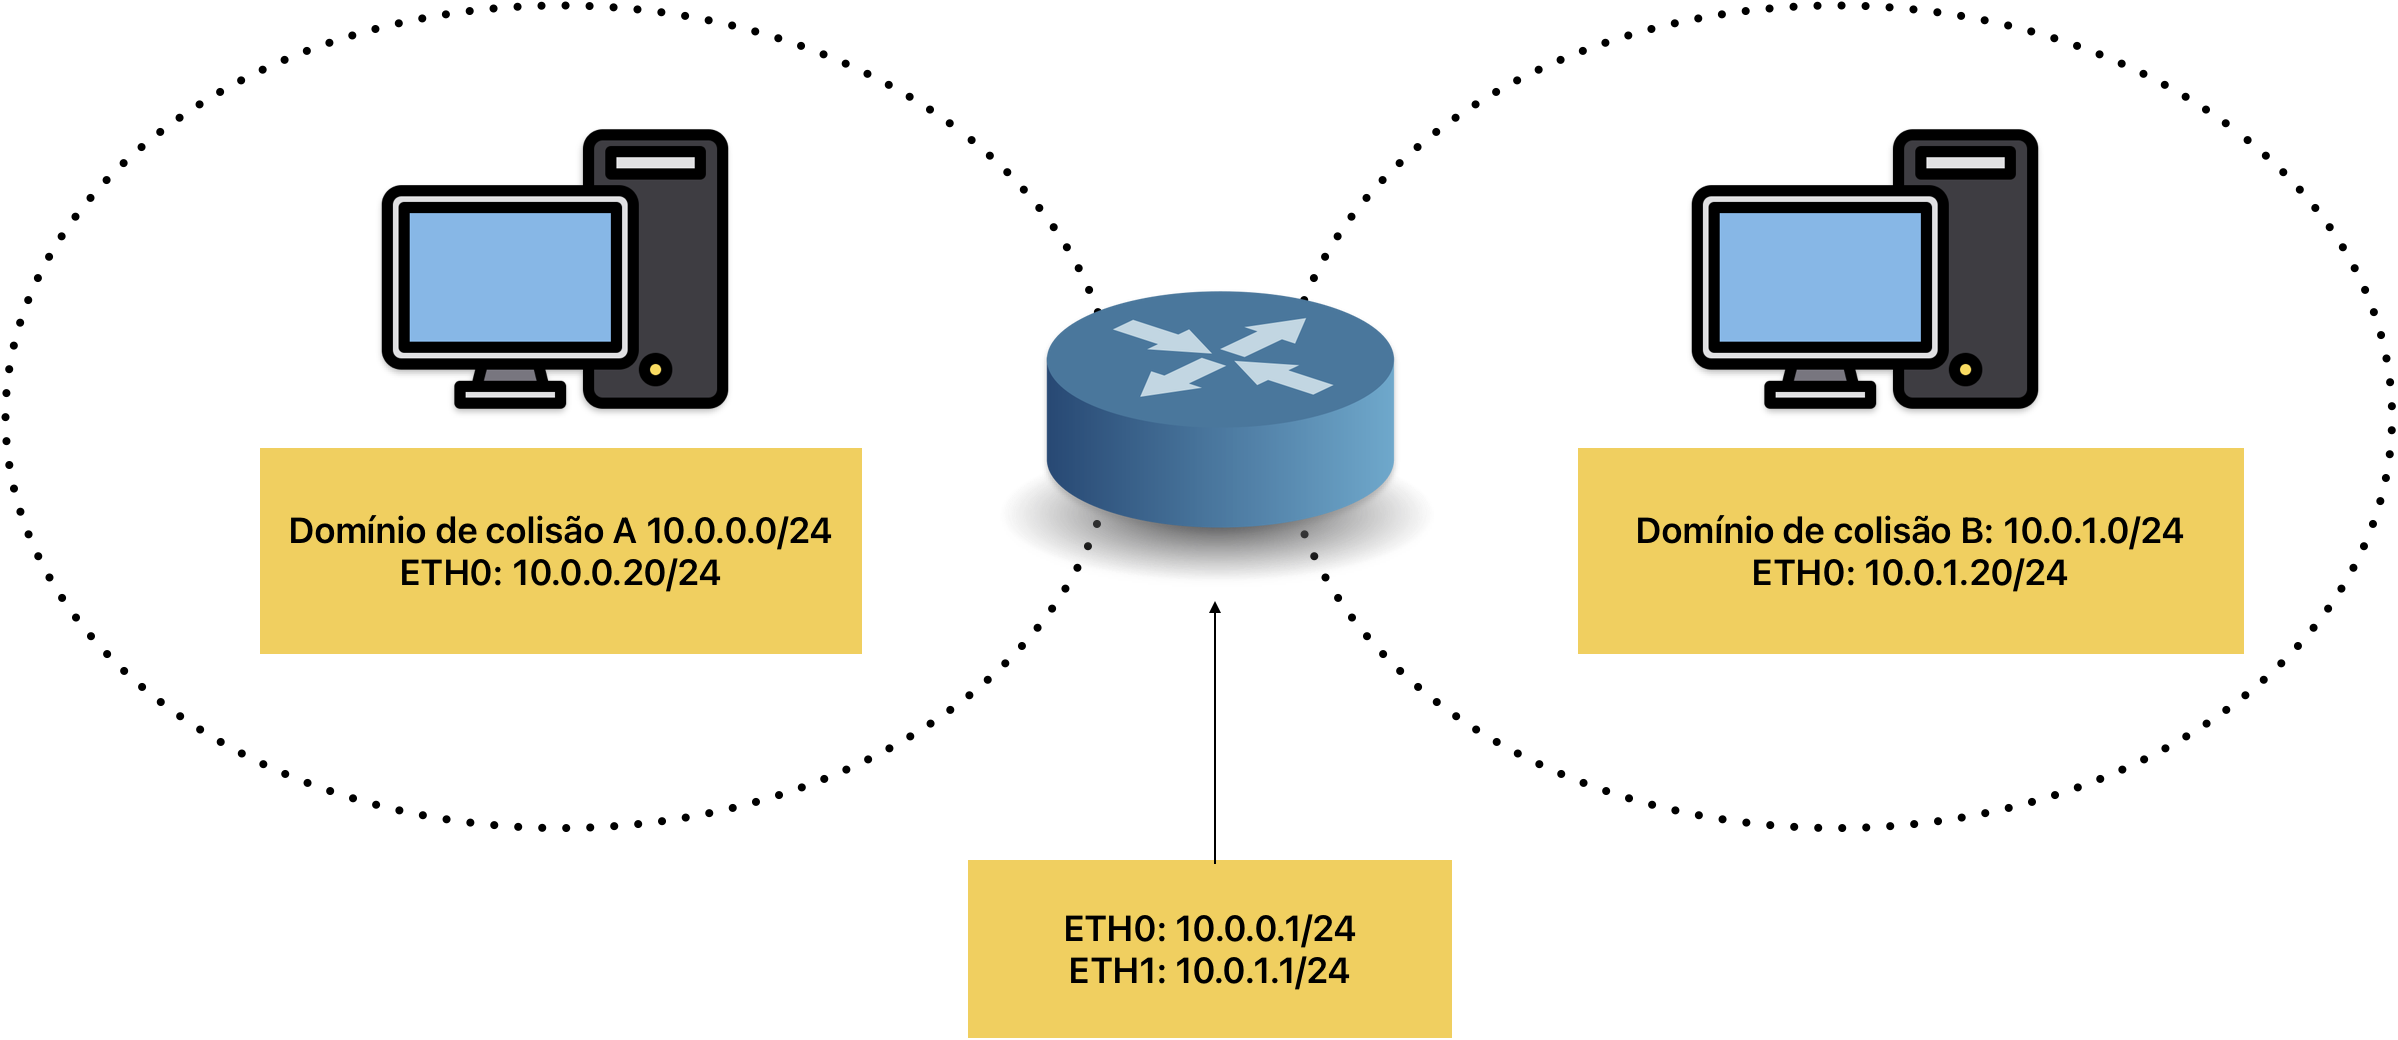

- Iniciamos criando os diretórios "pc1", "pc2" e "r2". Em seguida, criamos um arquivo de configuração "lab.conf" com as seguintes especificações:

In [ ]:
# Especificação PC1 com interface eth0 ligada ao domínio de colisão A
pc1[0]=A
# Especificação R1(roteador) com interface eth0 ligada ao domínio de colisão A
r1[0]=A

# Especificação PC2 com interface eth0 ligada ao domínio de colisão B
pc2[0]=B
# Especificação R1(roteador) com interface eth1 ligada ao domínio de colisão B
r1[1]=B

- Para iniciar o ambiente, execute o comando no mesmo path do arquivo lab.conf `kathara lstart`
Execução do laboratório:
- Ao iniciar o ambiente, é necessário habilitar as interfaces de rede e a conexão com o roteador usando os seguintes comandos:
> Habilitando a interface de rede no PC1 e atribuindo o IP 10.0.0.20 ao host: `ip addr add 10.0.0.20/24 dev eth0`<br/><br/>
> Habilitando a rota no pc1 ao domínio de colisão B via roteador: `ip route add 10.0.1.0/24 via 10.0.0.1`<br/><br/>
> Habilitando a interface de rede no PC2 e atribuindo o IP 10.0.1.20 ao host: `ip addr add 10.0.1.20/24 dev eth0`<br/><br/>
> Habilitando a rota no pc2 ao domínio de colisão A via roteador: `ip route add 10.0.0.0/24 via 10.0.1.1`<br/><br/>
> Habilitando as interfaces de rede no roteador r1: `ip addr add 10.0.0.1/24 dev eth0 && ip addr add 10.0.1.1/24 dev eth1`<br/><br/>

1. Simulando congestionamento
- Utilizaremos o tc (Traffic Control), uma ferramenta do Linux onde podemos configurar o controle de tráfego em uma interface de rede em conjunto com netem (Network Emulation), extensão do tc que permite emular várias condições de rede, incluindo perda de pacotes.
- Em nosso experimento, baseado no capítulo 1 tópico 1.4 Perda de Pacotes, iremos simular estouro de buffer na fila do roteador ligada ao domínio A.
> Para adicionar uma perda de pacote de 20% à interface que interliga o domínio A, execute o seguinte comando no host r1 (roteador): `tc qdisc add dev eth0 root netem loss 20%`.<br/><br/>
> Para capturar o tráfego da interface eth0 e salvar em um arquivo .pcap para análise posterior, execute o comando no roteador: `tcpdump -tenni eth0 -w /shared/capture.pcap`. A pasta shared fica exposta para o sistema hospedeiro, possibilitando a captura do arquivo para análise em ferramentas específicas.<br/><br/>
> Para enviar pacotes do PC1 ao PC2, execute o comando ping no PC1: `ping 10.0.1.20`.<br/><br/>
> Para acompanhar a recepção dos pacotes no PC2, execute o comando `tcpdump -tenni eth0`.<br/><br/>

2.  Analisando resultado:</br><br/>
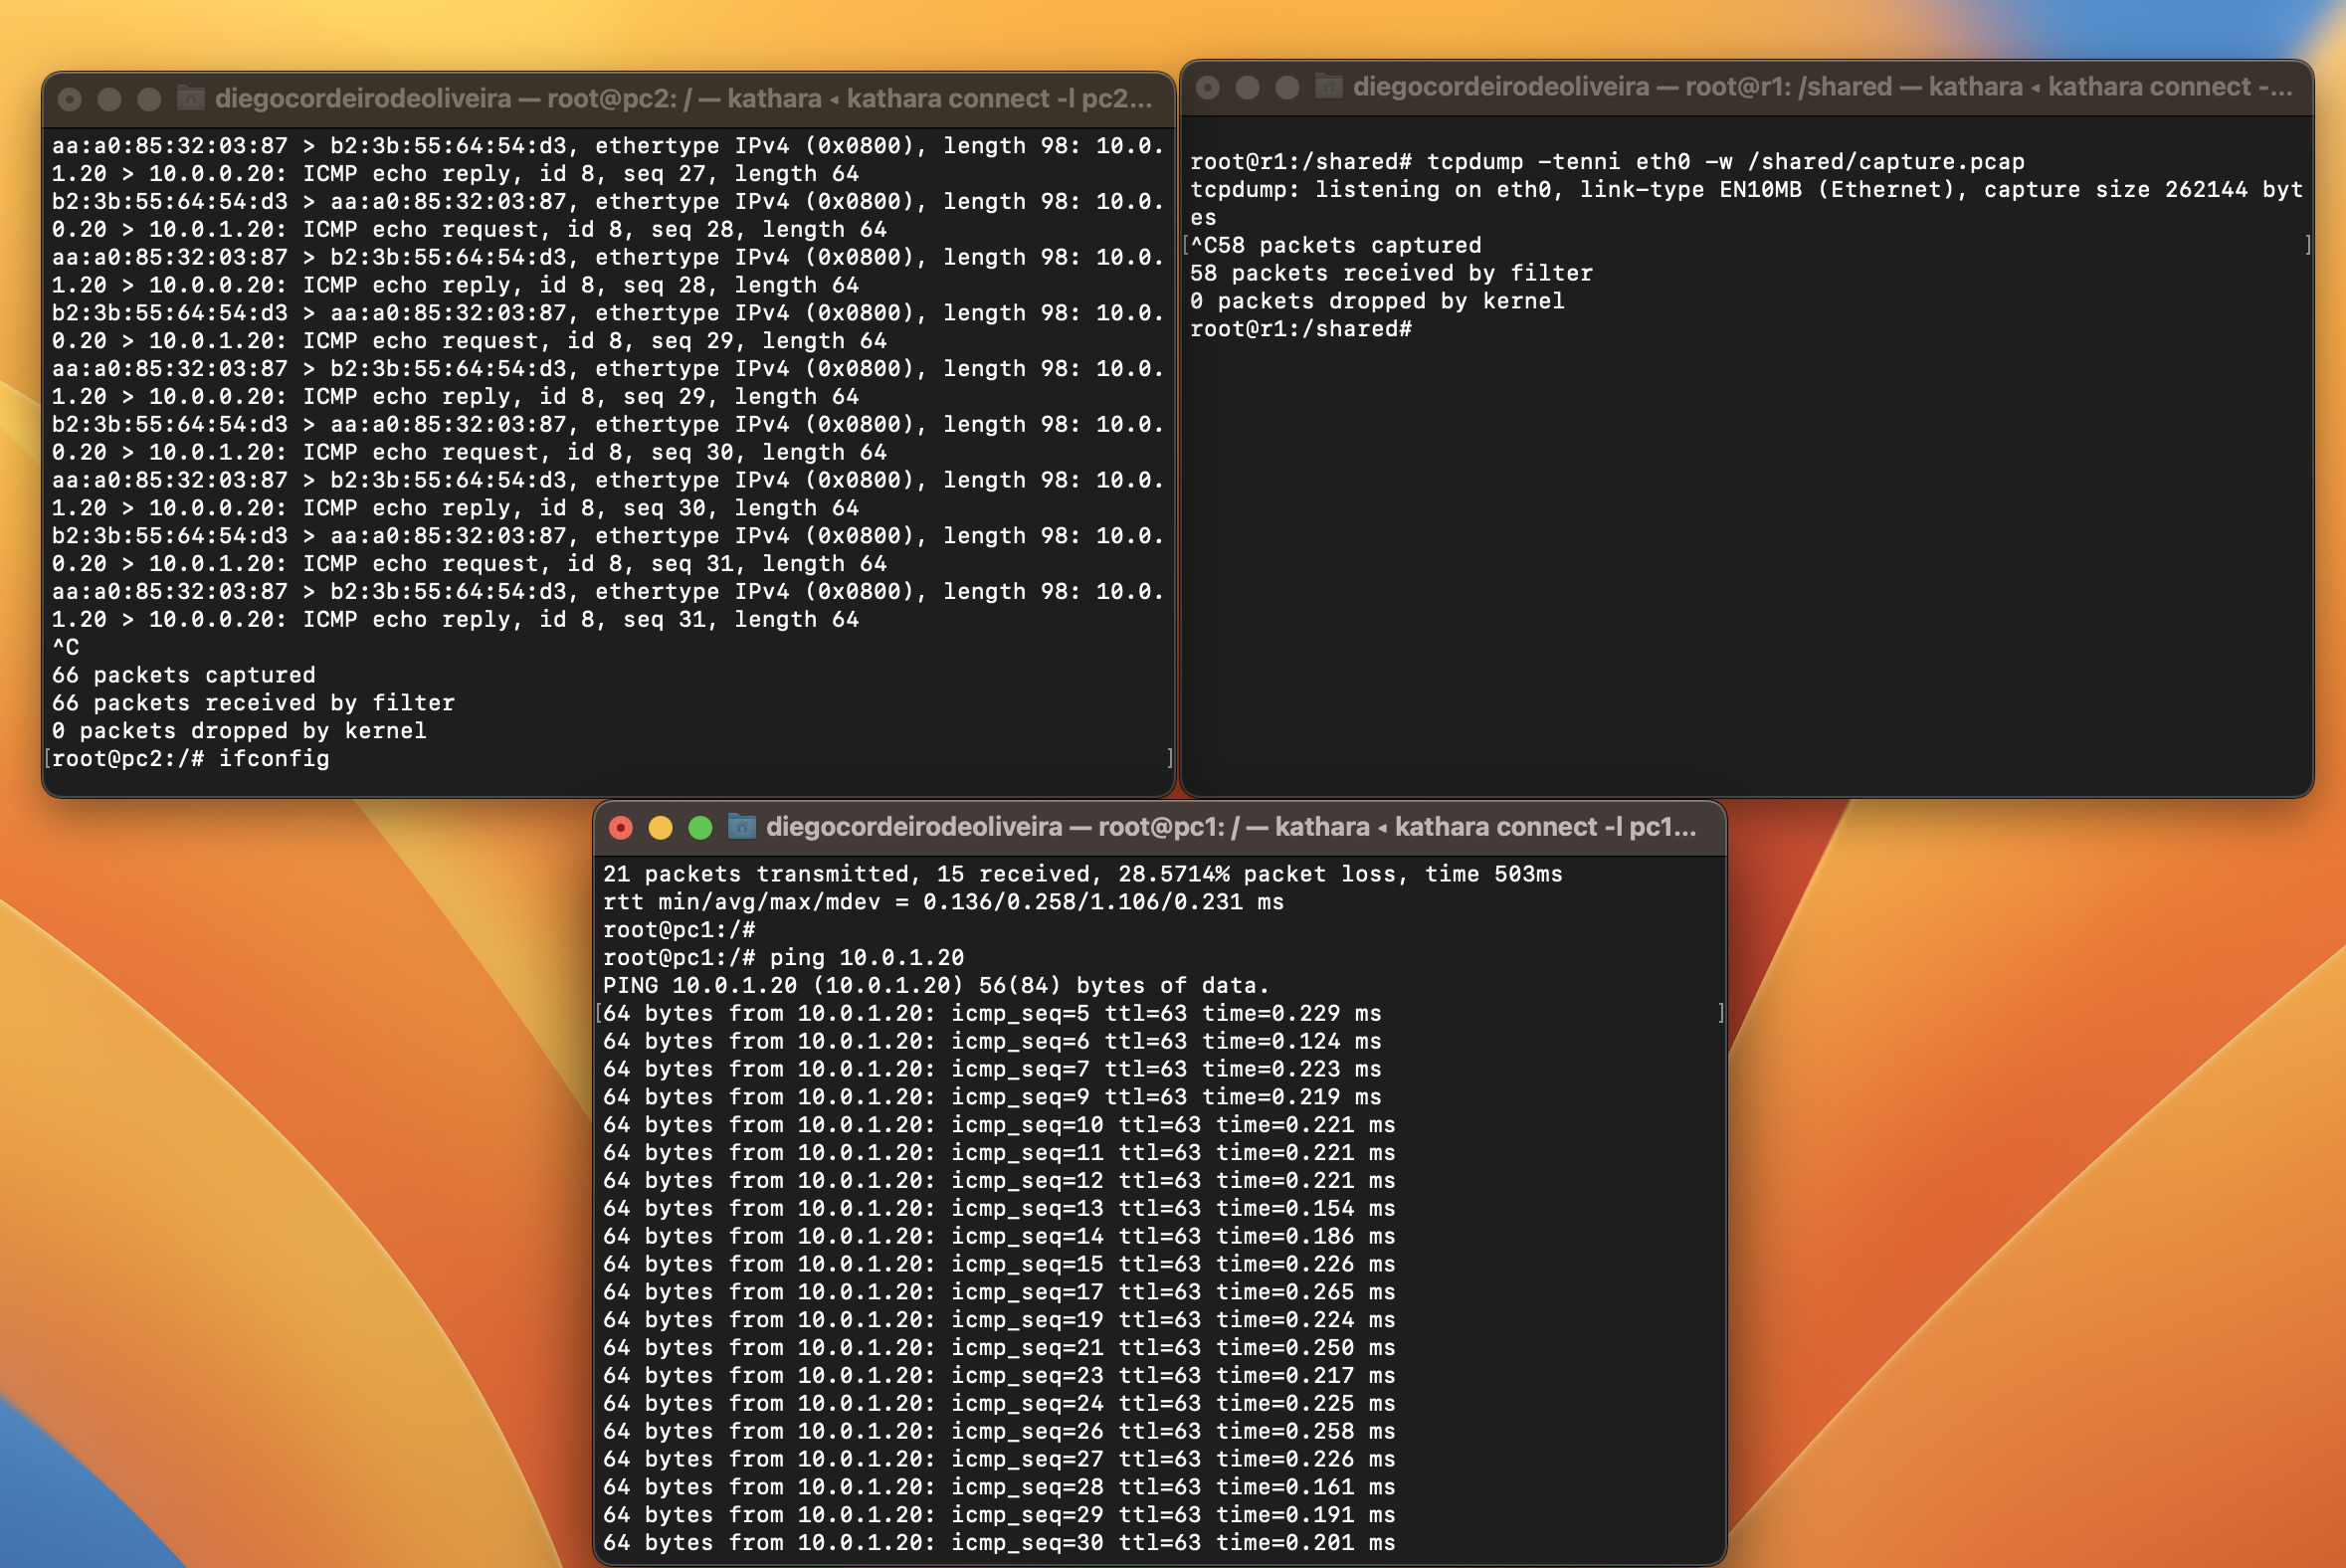
<p>Como podemos observar na imagem fornecida, os pacotes de números 1, 2, 3, 4, 8, 16, 18, 20, 22 e 25 foram descartados pelo roteador, simulando um estouro de fila. Dos 31 pacotes transmitidos, 10 foram perdidos, levando a uma perda de 32,25%.%</p> 


In [ ]:
PING 10.0.1.20 (10.0.1.20) 56(84) bytes of data.
64 bytes from 10.0.1.20: icmp_seq=5 ttl=63 time=0.229 ms
64 bytes from 10.0.1.20: icmp_seq=6 ttl=63 time=0.124 ms
64 bytes from 10.0.1.20: icmp_seq=7 ttl=63 time=0.223 ms
64 bytes from 10.0.1.20: icmp_seq=9 ttl=63 time=0.219 ms
64 bytes from 10.0.1.20: icmp_seq=10 ttl=63 time=0.221 ms
64 bytes from 10.0.1.20: icmp_seq=11 ttl=63 time=0.221 ms
64 bytes from 10.0.1.20: icmp_seq=12 ttl=63 time=0.221 ms
64 bytes from 10.0.1.20: icmp_seq=13 ttl=63 time=0.154 ms
64 bytes from 10.0.1.20: icmp_seq=14 ttl=63 time=0.186 ms
64 bytes from 10.0.1.20: icmp_seq=15 ttl=63 time=0.226 ms
64 bytes from 10.0.1.20: icmp_seq=17 ttl=63 time=0.265 ms
64 bytes from 10.0.1.20: icmp_seq=19 ttl=63 time=0.224 ms
64 bytes from 10.0.1.20: icmp_seq=21 ttl=63 time=0.250 ms
64 bytes from 10.0.1.20: icmp_seq=23 ttl=63 time=0.217 ms
64 bytes from 10.0.1.20: icmp_seq=24 ttl=63 time=0.225 ms
64 bytes from 10.0.1.20: icmp_seq=26 ttl=63 time=0.258 ms
64 bytes from 10.0.1.20: icmp_seq=27 ttl=63 time=0.226 ms
64 bytes from 10.0.1.20: icmp_seq=28 ttl=63 time=0.161 ms
64 bytes from 10.0.1.20: icmp_seq=29 ttl=63 time=0.191 ms
64 bytes from 10.0.1.20: icmp_seq=30 ttl=63 time=0.201 ms
64 bytes from 10.0.1.20: icmp_seq=31 ttl=63 time=0.135 ms
^C
--- 10.0.1.20 ping statistics ---
31 packets transmitted, 21 received, 32.2581% packet loss, time 744ms
rtt min/avg/max/mdev = 0.124/0.208/0.265/0.039 ms

- A visualização do funcionamento do protocolo ARP (Address Resolution Protocol) para a resolução dos endereços MAC é de grande importância para entendermos como os endereços de rede são mapeados para os endereços físicos em uma rede. Esse protocolo é amplamente utilizado em redes Ethernet para traduzir os endereços IP em endereços MAC, permitindo a comunicação entre dispositivos na rede. 
- Podemos visualizar o trabalho do procolo ARP (Address Resolution Protocol) para a resolução dos endereços MAC no roteador.

In [ ]:
tcpdump: verbose output suppressed, use -v or -vv for full protocol decode
# O primeiro pacote ARP é uma solicitação de quem-tem (Request who-has) enviada pelo dispositivo com o endereço MAC aa:a0:85:32:03:87 (pc2) para descobrir o endereço MAC do dispositivo com o endereço IP 10.0.1.1. O pacote é destinado ao endereço MAC b2:3b:55:64:54:d3 (Roteador):
aa:a0:85:32:03:87 > b2:3b:55:64:54:d3, ethertype ARP (0x0806), length 42: Request who-has 10.0.1.1 tell 10.0.1.20, length 28
# O segundo pacote ARP é outra solicitação de quem-tem, desta vez enviada pelo dispositivo com o endereço MAC b2:3b:55:64:54:d3 (Roteador) para descobrir o endereço MAC do dispositivo com o endereço IP 10.0.1.20. O pacote é destinado ao endereço MAC aa:a0:85:32:03:87 (pc1):
b2:3b:55:64:54:d3 > aa:a0:85:32:03:87, ethertype ARP (0x0806), length 42: Request who-has 10.0.1.20 tell 10.0.1.1, length 28
# O terceiro pacote ARP é uma resposta (Reply) enviada pelo dispositivo com o endereço MAC aa:a0:85:32:03:87 (pc1) para informar que ele é o proprietário do endereço IP 10.0.1.20. O pacote é destinado ao endereço MAC b2:3b:55:64:54:d3 (Roteador):
aa:a0:85:32:03:87 > b2:3b:55:64:54:d3, ethertype ARP (0x0806), length 42: Reply 10.0.1.20 is-at aa:a0:85:32:03:87, length 28
#O quarto e último pacote ARP é outra resposta (Reply) enviada pelo dispositivo com o endereço MAC b2:3b:55:64:54:d3 (Roteador) para informar que ele é o proprietário do endereço IP 10.0.1.1. O pacote é destinado ao endereço MAC aa:a0:85:32:03 (pc1):
b2:3b:55:64:54:d3 > aa:a0:85:32:03:87, ethertype ARP (0x0806), length 42: Reply 10.0.1.1 is-at b2:3b:55:64:54:d3, length 28


- A seguir podemos visualizar o trafego capturado pelo tcpdump e exportado para extensão .pcap onde pode ser observado a perca de pacotes no buffer de entrada do domínio A<br/><br/>
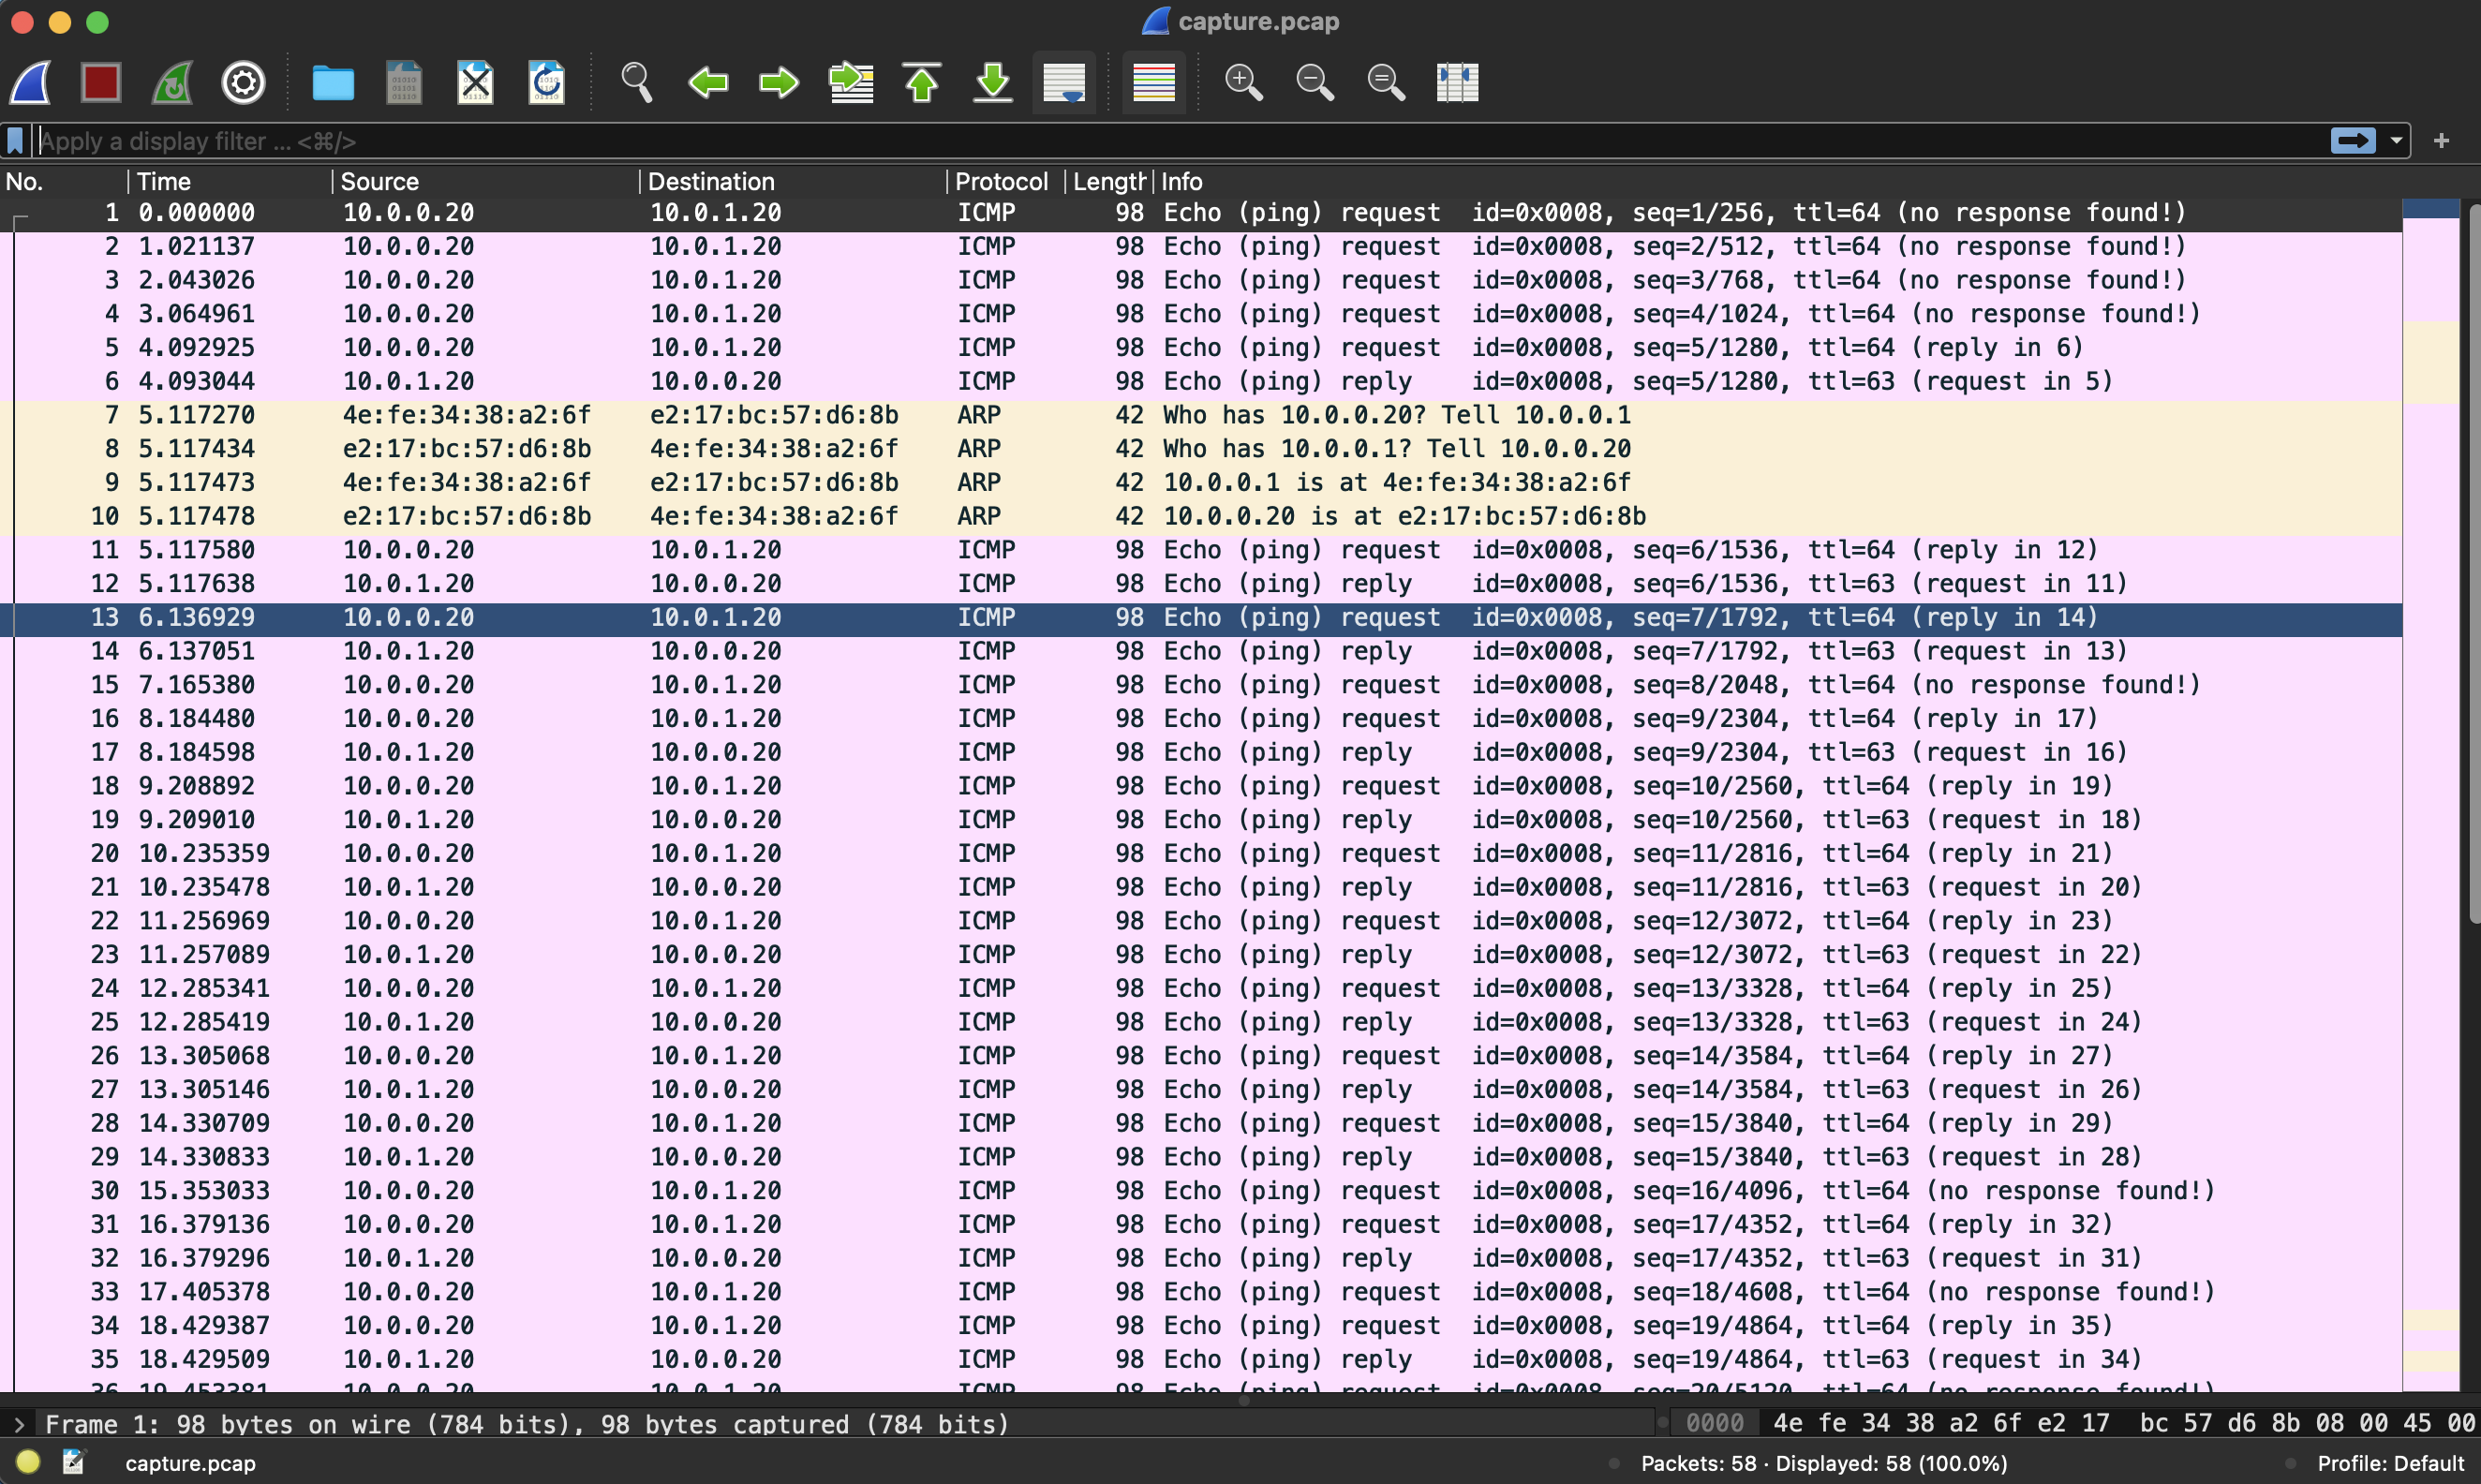